## 크론바흐 알파계수 Cronbach Alpha Coefficient

#### IMPORT


In [2]:
import pandas as pd 
import numpy as np 

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import sklearn 
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5) 
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. 
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import scipy 
from scipy import  stats

- 크론바흐 알파계수 
    - 설문조사의 문항 결과들이 일관성 있게 나타나는가 : 신뢰도 분석
    - 척도의 신뢰성 :  한 대상을 여러번 측정하거나, 한가지 측정도구로 반복 측정하였을 때 일관성 있는 결과가 나오는 것
    - 신뢰성에는 여라가지 종류가 있는데 그 중 가장 주로 사용되는 것이 내적일관성
    - 신뢰성 분석은 주로 크론바흐 알파(Cronbach's alpha) 계수를 통해 확인이 이루어진다. 
    - **0.6 이상 = 양호**
    - 0.7 이상 = 높다 
    - 굉장히 많이 쓰인다

- 즉 다시말해 한 30번째 부터 대충 찍어버리는지? 아닌지 ? 보려구 하는것
    - 통계 분석 전에 설문지의 답안에 대한 신뢰도륵 측정하여 제시
    

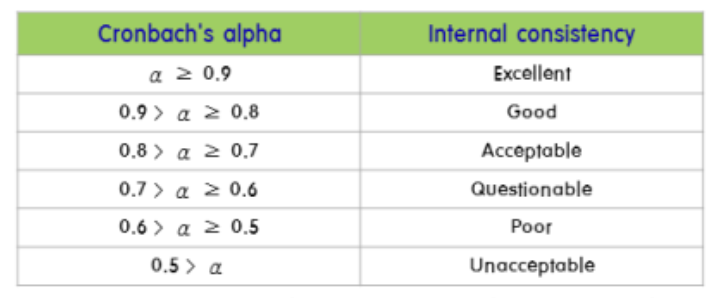

- 만약 설문지의 신뢰도가 낮게 측정되었다면 
- 그 요인을 제거 한 후 다시 신뢰도를 측정함으로써 신뢰도를 높일 수 있다. 
- 통상 신뢰도는 **항목이 많을 수록** , **척도점이 많을수록 높아진다.**
    -  통상 0.6 이상을 신뢰성이 있다라고 얘기하며 
    - 0.6 미만으로 나오면 그 설문지는 폐기하거나 수정해야 된다.

In [ ]:
!pip install pingouin

import pingouin as pg

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
df = pd.read_csv('/content/drive/MyDrive/data/[AIB] Daily Reflection - [AI 부트캠프 - 7기] Daily Reflection.csv' , encoding='UTF8')

df = df.drop('name', axis = 1)
df = df.drop('userid', axis = 1)
df = df.drop('Submitted At', axis = 1)
df = df.drop('Token', axis = 1)
df = df.drop('email', axis = 1)
df

,*부트캠프 기수*,*노트 번호*,*기상 시간*,*학습 시간*,*Sentiment 1*,*Sentiment 2*,*체감 난이도*,*학습 목표 달성*,*TIL*
0,7,111,오전 8시,1,1,1,2,1,test
1,7,211,오전 6시 (이전 시간 포함),5,5,1,4,5,회귀계수와 y 절편
2,7,211,오전 7시,8,5,3,4,6,"단순선형회귀, 선형회귀모델의 계수, OLS"
3,7,211,오전 8시,5,6,1,2,5,linear regression\n지도학습과 비지도학습의 차이\n회귀 / 분류\n기준모델
4,7,211,오전 7시,7,6,1,2,7,(Simple) Linear Regression\nOLS\nSSE/RSS\nskle...
...,...,...,...,...,...,...,...,...,...
800,7,334,오전 6시 (이전 시간 포함),5,4,6,5,6,utc 복호화 부호화 스케쥴러
801,7,334,오전 7시,5,3,2,3,5,"시간, 스케줄러, 부호화"
802,7,334,오전 8시,3,1,1,3,4,시간 설정의 중요성 / ISO 8160 / UTC / Epoch time(UNIX ...
803,7,334,오전 9시 (이후 시간 포함),3,5,1,4,4,"복호화, 부호화, 스케쥴링, timestamp"


In [35]:
df1 = df[['*Sentiment 1*',	'*Sentiment 2*',	'*체감 난이도*',	'*학습 목표 달성*']]
pg.cronbach_alpha(data = df1)

(-0.26981432673521566, array([-0.419, -0.132]))

 마이너스가 나왔다는건 내적일관성이 떨어진다는 의미 

In [41]:
df2 = df[['*Sentiment 1*',	'*Sentiment 2*']]
pg.cronbach_alpha(data = df2)

(-1.4320855743613694, array([-1.793, -1.118]))

이것도 ,,,

In [43]:
df3 = df[['*학습 시간*','*체감 난이도*']]
pg.cronbach_alpha(data = df3)

(0.21407020123459009, array([0.097, 0.316]))

In [44]:
df4 = df[['*학습 시간*','*학습 목표 달성*']]
pg.cronbach_alpha(data = df4)

(0.45625749672047955, array([0.376, 0.527]))

그나마 학습시간과 학습목표달성 두 컬럼이 내적 일관성이 동일하다. 

In [53]:
df4.corr()

,*학습 시간*,*학습 목표 달성*
*학습 시간*,1.000000,0.304006
*학습 목표 달성*,0.304006,1.000000


상관관계는 딱히 ,,, 없는데 

- 측정도구가 어떤 대상자가 답변하든 일관된 답변을 받을 수있는지에 대한 분석이 : 신뢰성 분석 
- 그니까 측정 그 자체를 말하고

- 측정도구나 방법을 말하는건 : 타당성 분석 
- 신뢰성 분석이 더 포괄적임 